# StackOverflow Insights

### By Serene Gao and Korrawat Jianthanakanon

### Data Source:
StackLite by StackOverflow (Version 4)
https://www.kaggle.com/stackoverflow/stacklite
https://data.stackexchange.com/stackoverflow/query/637401/question-text-for-ruby-on-rails

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/serenegao/miniconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
question_tags = pd.read_csv('question_tags.csv')
len(question_tags)

50576842

In [3]:
question_tags.head(1)

,Id,Tag
0,1,data


In [4]:
questions = pd.read_csv('questions.csv')
len(questions)

17203824

In [5]:
questions.head(1)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount
0,1,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1,NaN,0.0


## Process Data

In [6]:
# Convert dates to datetime objects
dt_creation = pd.to_datetime(questions['CreationDate'])
dt_closed = pd.to_datetime(questions['ClosedDate'])
dt_deletion = pd.to_datetime(questions['DeletionDate'])
q_creation = questions.assign(creation = dt_creation)
q_closed = q_creation.assign(closed = dt_closed)
q_with_date = q_closed.assign(deletion = dt_deletion)

In [7]:
q_with_date.head(1)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,creation,closed,deletion
0,1,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1,NaN,0.0,2008-07-31 21:26:37,NaT,2011-03-28 00:53:47


## Throughout the years...

### 1) Number of questions

In [8]:
q_year = q_with_date
q_year['creationyear'] = q_with_date['creation'].apply(lambda x: x.year)

In [9]:
q_each_year = q_year['creationyear'].value_counts().sort_index()

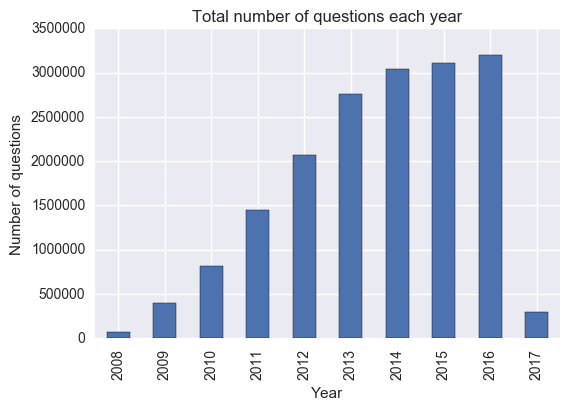

In [10]:
q_by_year = q_each_year.plot(kind='bar', title='Total number of questions each year')
q_by_year.set_xlabel("Year")
q_by_year.set_ylabel("Number of questions")
q_by_year

**Observation:** Number of questions increased every year. Slowing growth in the past 2 years.

**Remark:** 2008 is the year StackOverflow is founded. 2008 and 2017 not full years.

In [11]:
q_year_closed = q_year[q_year['closed'].notnull()]

In [12]:
q_year_closed.head(1)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,creation,closed,deletion,creationyear
3,8,2008-07-31T23:33:19Z,2013-06-03T04:00:25Z,2015-02-11T08:26:40Z,42,NaN,8.0,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,2008


In [13]:
q_closed_each_year = q_year_closed['creationyear'].value_counts().sort_index()

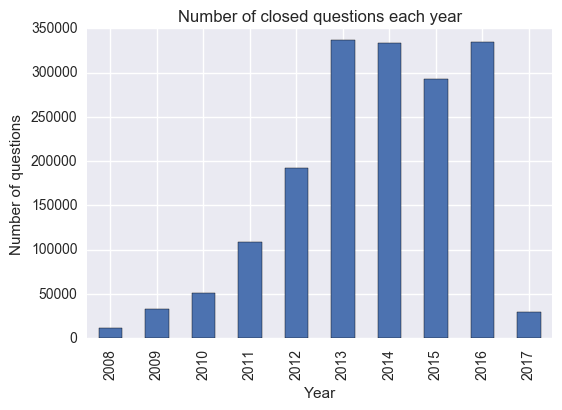

In [14]:
q_by_year_closed = q_closed_each_year.plot(kind='bar', title='Number of closed questions each year')
q_by_year_closed.set_xlabel("Year")
q_by_year_closed.set_ylabel("Number of questions")
q_by_year_closed

**Observation:** Closed questions (includes duplicates, opinion-based, etc) increased until 2013 when it is relatively stable after

In [15]:
q_year_notclosed = q_year[q_year['closed'].isnull()]
q_year_open = q_year_notclosed[q_year_notclosed['deletion'].isnull()]

In [16]:
q_year_open.head(1)

,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,creation,closed,deletion,creationyear
1,4,2008-07-31T21:42:52Z,NaN,NaN,458,8.0,13.0,2008-07-31 21:42:52,NaT,NaT,2008


In [17]:
q_open_each_year = q_year_open['creationyear'].value_counts().sort_index()

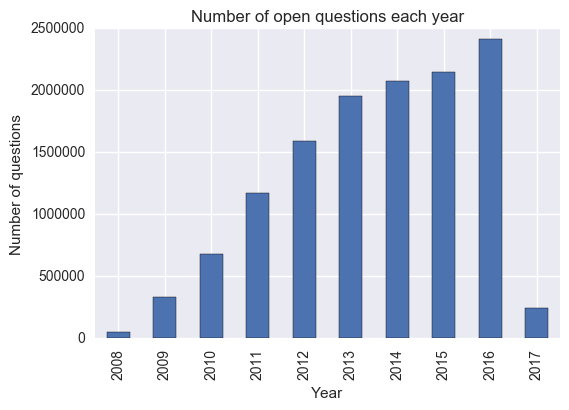

In [18]:
q_by_year_open = q_open_each_year.plot(kind='bar', title='Number of open questions each year')
q_by_year_open.set_xlabel("Year")
q_by_year_open.set_ylabel("Number of questions")
q_by_year_open

### 2) Number of answers

In [19]:
q_year_ans = q_year[['creationyear', 'AnswerCount']]

In [20]:
q_year_ans_mean = q_year_ans.groupby('creationyear').mean()

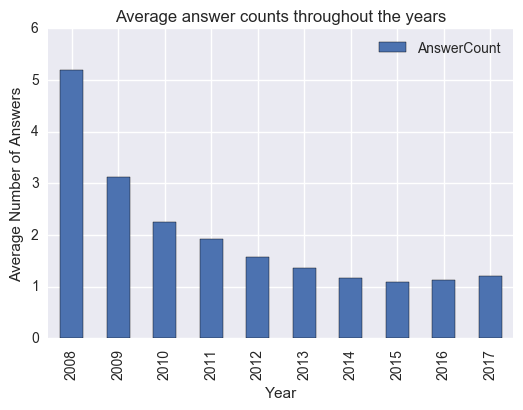

In [21]:
avg_anscount_year = q_year_ans_mean.plot(kind='bar', title='Average answer counts throughout the years', y='AnswerCount')
avg_anscount_year.set_xlabel("Year")
avg_anscount_year.set_ylabel("Average Number of Answers")
avg_anscount_year

**Observations** Average number of questions have been declining each year

### 3) Scores

In [22]:
q_year_score = q_year[['creationyear', 'Score']]

In [23]:
q_year_score_mean = q_year_score.groupby('creationyear').mean()

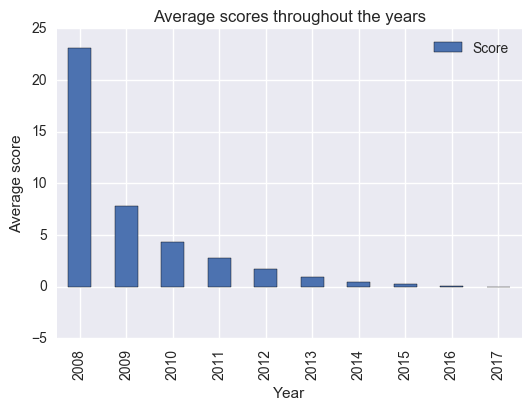

In [24]:
avg_score_year = q_year_score_mean.plot(kind='bar', title='Average scores throughout the years', y='Score')
avg_score_year.set_xlabel("Year")
avg_score_year.set_ylabel("Average score")
avg_score_year

In [25]:
q_year_score_mean_exc = q_year_score_mean.drop([2008,2017])

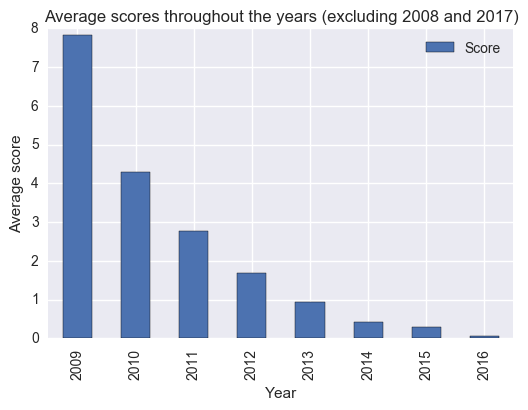

In [26]:
avg_score_year = q_year_score_mean_exc.plot(kind='bar', title='Average scores throughout the years (excluding 2008 and 2017)', y='Score')
avg_score_year.set_xlabel("Year")
avg_score_year.set_ylabel("Average score")
avg_score_year

**Observation:** Average scores have been declining. This could be due to lower quality questions and answers or increased amount of questions or other reasons.

### 4) Tags

In [27]:
cb = pd.concat([question_tags, q_with_date], axis=1)
tag_year = cb[['Tag','creationyear']]

# storing top 50 tags
top_tag = tag_year['Tag'].value_counts()
top_tag.head(50).to_csv("top_tag.csv")

In [66]:
# to see how each tag change over years
tag_by_year = tag_year.groupby(['Tag', 'creationyear']).size().reset_index(name="freq")

In [69]:
tag_by_year.sort_values('freq', ascending=0).head()

,Tag,creationyear,freq
95421,java,2016.0,96966
96019,javascript,2016.0,91453
142717,php,2016.0,90198
95420,java,2015.0,90054
95419,java,2014.0,88563


In [70]:
tag_by_year.sort_values(['freq'], ascending=0)

# take pandas for example, a better version of graph is done in Tableau
tag_by_year_pandas = tag_by_year.loc[tag_by_year['Tag'] == "pandas"]
#tag_by_year_pandas.plot(x='creationyear', y='freq')

tag_by_year_pandas.to_csv('pandas.csv')

tag_by_year_r = tag_by_year.loc[tag_by_year['Tag'] == "r"]
#tag_by_year_r.plot(x='creationyear', y='freq')

tag_by_year_r.to_csv('r.csv')

tag_by_year_ror = tag_by_year.loc[tag_by_year['Tag'] == "ruby-on-rails"]
#tag_by_year_ror.plot(x='creationyear', y='freq')

tag_by_year_ror.to_csv('ror.csv')

## Throughout the week...
Day of the week [ 0 = Monday ; 6 = Sunday ]

### 1) Number of questions
#### in 2016

In [30]:
q_day_2016 = q_year[q_year['creationyear'] == 2016]

In [31]:
q_creation_day_2016 = q_day_2016['creation'].apply(lambda x: x.weekday())
q_day_2016 = q_day_2016.assign(creationday = q_creation_day_2016)

In [32]:
q_each_day_2016 = q_day_2016['creationday'].value_counts().sort_index()

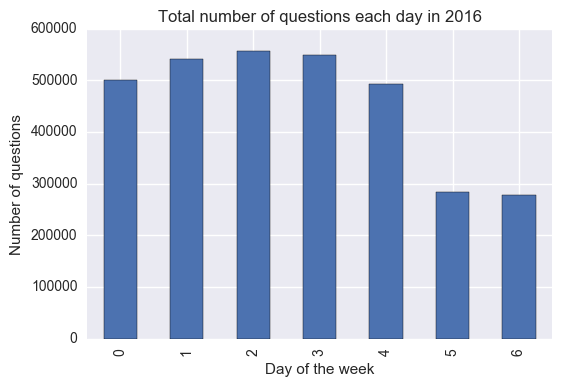

In [33]:
q_by_day_2016 = q_each_day_2016.plot(kind='bar', title='Total number of questions each day in 2016')
q_by_day_2016.set_xlabel("Day of the week")
q_by_day_2016.set_ylabel("Number of questions")
q_by_day_2016

#### throughout the years

In [34]:
# q_year_day = q_day.groupby(["creationyear", "creationday"]).size()

In [35]:
q_day = q_year
q_creation_day = q_day['creation'].apply(lambda x: x.weekday())
q_day = q_day.assign(creationday = q_creation_day)

In [36]:
q_year_day_pivot = q_day.pivot_table(index='creationday', columns='creationyear', values='Id', aggfunc=len)

In [37]:
q_year_day_pivot

creationyear,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
creationday,,,,,,,,,,
0,11086,62130,129287,227740,329335,436982,480571,491442,500216,44326
1,13282,69805,141499,248538,347764,472454,518600,531604,541918,49737
2,13125,71531,144760,253513,357719,474939,531186,540671,556755,51603
3,12424,70334,143261,249901,357373,472288,516592,531144,548941,50764
4,11187,61014,127518,222800,319998,423331,460209,466276,491838,46078
5,4710,30307,67325,122651,176936,239911,266173,271409,283452,27233
6,4558,29446,66511,119999,176539,239537,267109,273174,278324,31131


In [38]:
q_year_day_pivot_exc = q_year_day_pivot.drop([2008, 2017], axis=1)

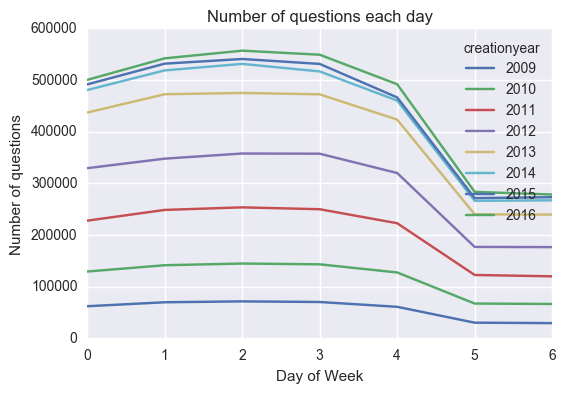

In [39]:
q_year_day_pivot_exc_plot = q_year_day_pivot_exc.plot(title='Number of questions each day')
q_year_day_pivot_exc_plot.set_xlabel("Day of Week")
q_year_day_pivot_exc_plot.set_ylabel("Number of questions")
q_year_day_pivot_exc_plot

### 2) Number of answers
#### in 2016

In [40]:
q_day_ans_2016 = q_day_2016[['creationday', 'AnswerCount']]

In [41]:
q_day_ans_2016_mean = q_day_ans_2016.groupby('creationday').mean()

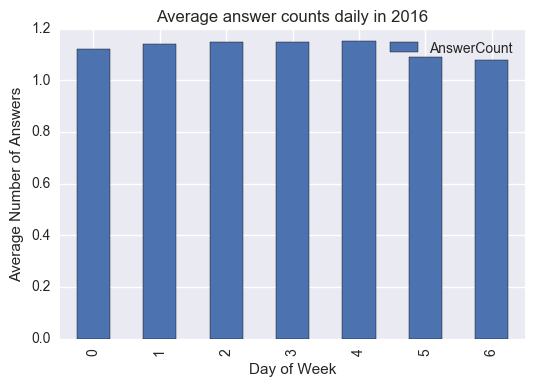

In [42]:
avg_anscount_day_2016 = q_day_ans_2016_mean.plot(kind='bar', title='Average answer counts daily in 2016', y='AnswerCount')
avg_anscount_day_2016.set_xlabel("Day of Week")
avg_anscount_day_2016.set_ylabel("Average Number of Answers")
avg_anscount_day_2016

#### throughout the years

In [43]:
q_day_ans = q_day[['creationyear', 'creationday', 'AnswerCount']]

In [44]:
q_day_ans_pivot = q_day.pivot_table(index='creationday', columns='creationyear', values='AnswerCount')

In [45]:
q_day_ans_pivot_exc = q_day_ans_pivot.drop([2008, 2017], axis=1)

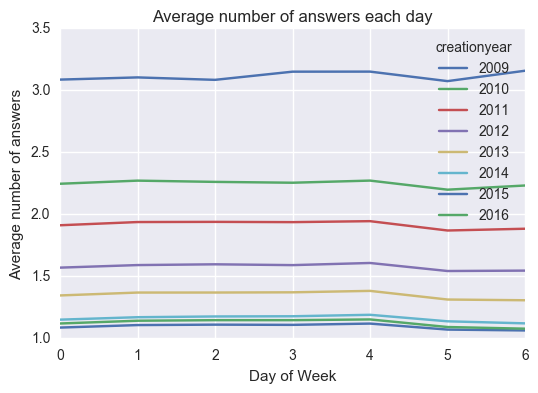

In [46]:
q_day_ans_pivot_exc_plot = q_day_ans_pivot_exc.plot(title='Average number of answers each day')
q_day_ans_pivot_exc_plot.set_xlabel("Day of Week")
q_day_ans_pivot_exc_plot.set_ylabel("Average number of answers")
q_day_ans_pivot_exc_plot

### 3) Scores
#### in 2016

In [47]:
q_day_score_2016 = q_day_2016[['creationday', 'Score']]

In [48]:
q_day_score_2016_mean = q_day_score_2016.groupby('creationday').mean()

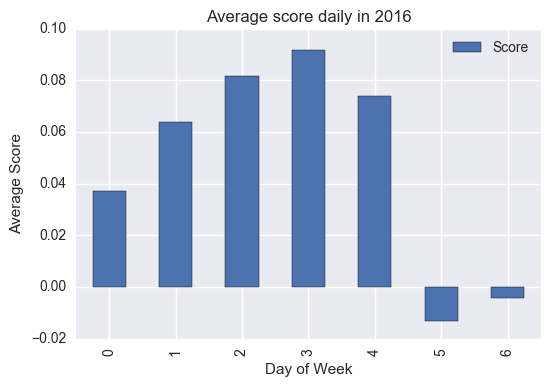

In [49]:
avg_score_day_2016 = q_day_score_2016_mean.plot(kind='bar', title='Average score daily in 2016', y='Score')
avg_score_day_2016.set_xlabel("Day of Week")
avg_score_day_2016.set_ylabel("Average Score")
avg_score_day_2016

#### throughout the years

In [50]:
q_day_score = q_day[['creationyear', 'creationday', 'Score']]

In [51]:
q_day_score_pivot = q_day_score.pivot_table(index='creationday', columns='creationyear', values='Score')

In [52]:
q_day_score_pivot_exc = q_day_score_pivot.drop([2008, 2017], axis=1)

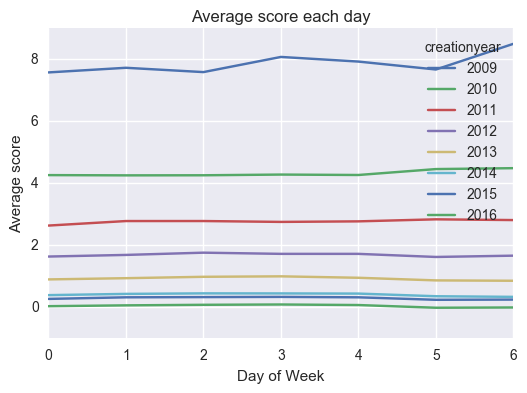

In [53]:
q_day_score_pivot_exc_plot = q_day_score_pivot_exc.plot(title='Average score each day')
q_day_score_pivot_exc_plot.set_xlabel("Day of Week")
q_day_score_pivot_exc_plot.set_ylabel("Average score")
q_day_score_pivot_exc_plot

## Throughout the day...

In [54]:
ans_tod = q_with_date[['Id', 'AnswerCount', 'creation']]

In [72]:
# ans_tod['hour'] = ans_tod['creation'].apply(lambda x: x.hour)

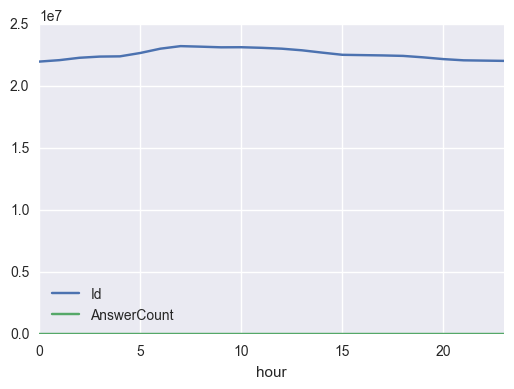

In [56]:
ans_tod.groupby('hour').mean().plot()

ans_tod.groupby('hour').mean().to_csv("ans_by_tod.csv")

## How many tags should I use to get the most answers?

In [57]:
cb.head()

,Id,Tag,Id,CreationDate,ClosedDate,DeletionDate,Score,OwnerUserId,AnswerCount,creation,closed,deletion,creationyear
0,1,data,1.0,2008-07-31T21:26:37Z,NaN,2011-03-28T00:53:47Z,1.0,NaN,0.0,2008-07-31 21:26:37,NaT,2011-03-28 00:53:47,2008.0
1,4,c#,4.0,2008-07-31T21:42:52Z,NaN,NaN,458.0,8.0,13.0,2008-07-31 21:42:52,NaT,NaT,2008.0
2,4,winforms,6.0,2008-07-31T22:08:08Z,NaN,NaN,207.0,9.0,5.0,2008-07-31 22:08:08,NaT,NaT,2008.0
3,4,type-conversion,8.0,2008-07-31T23:33:19Z,2013-06-03T04:00:25Z,2015-02-11T08:26:40Z,42.0,NaN,8.0,2008-07-31 23:33:19,2013-06-03 04:00:25,2015-02-11 08:26:40,2008.0
4,4,decimal,9.0,2008-07-31T23:40:59Z,NaN,NaN,1410.0,1.0,58.0,2008-07-31 23:40:59,NaT,NaT,2008.0


In [58]:
tag_ans = cb[['Id', 'Tag', 'AnswerCount']]

In [59]:
tag_ans.head()

,Id,Id,Tag,AnswerCount
0,1,1.0,data,0.0
1,4,4.0,c#,13.0
2,4,6.0,winforms,5.0
3,4,8.0,type-conversion,8.0
4,4,9.0,decimal,58.0


In [60]:
tag_ans.columns=['Id', 'dup', 'Tag', 'AnswerCount']

In [61]:
tag_ans = tag_ans[['Id', 'Tag', 'AnswerCount']]

In [62]:
q_tag_ans = tag_ans.groupby('Id').size().reset_index(name='TagCount')

In [63]:
q_tag_ans['AnswerCount'] = questions['AnswerCount']

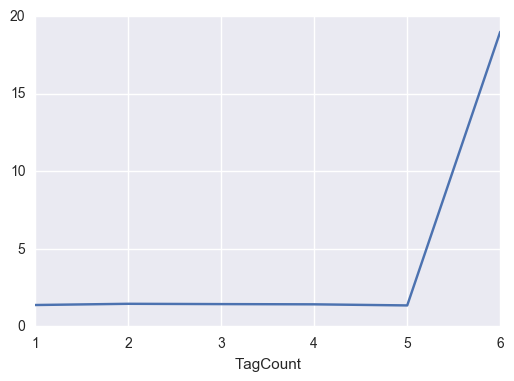

In [64]:
q_tag_ans.groupby('TagCount')['AnswerCount'].mean().plot()

In [65]:
q_tag_ans.groupby('TagCount')['AnswerCount'].mean().to_csv("answerByTags.csv")